In [724]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [725]:
from sklearn.datasets import load_iris
data = load_iris()

In [726]:
x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.DataFrame(data.target)

## Problem 1

In [727]:
import numpy as np
from collections import Counter


def minkowski_distance(vector_a, vector_b, r=1):
    return (np.sum(abs(vector_a-vector_b)**r))**(1/r)


class KNN():

    def __init__(self,k=3,r=1):
        self.k = k
        self.r = r

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict(self, X):
        y_pred = np.array([self._predict(x) for x in X.values])
        output = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]).tolist()
        predict=[]
        for i in range(len(output)):
            prediction=max(set(output[i]),key=output.count)
            predict.append(prediction)
        prediction = np.array(predict)
        return prediction
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [minkowski_distance(x, x_train, self.r) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        return k_neighbor_labels
    
    def accuracy_score(self,y_test,predicted):
        correct=0
        actual = np.array(y_test)
        for i in range(len(actual)):
            if actual[i]==predicted[i]:
                correct+=1
        return correct/len(predicted)*100
        

## Problem 2

In [824]:
def traing_set(x,y):
    set_1, label_1 = x[:40],y[:40]
    set_2, label_2 = x[50:90], y[50:90]
    set_3, label_3 = x[100:140], y[100:140]
    features = pd.concat([set_1,set_2,set_3],axis=0)
    labels = pd.concat([label_1,label_2,label_3],axis=0)
    return features, labels


def testing_set(x,y):
    set_1, label_1 = x[40:50],y[40:50]
    set_2, label_2 = x[90:100], y[90:100]
    set_3, label_3 = x[140:150], y[140:150]
    features = pd.concat([set_1,set_2,set_3],axis=0)
    labels = pd.concat([label_1,label_2,label_3],axis=0)
    return features, labels

x_train, y_train = traing_set(x,y)
x_test, y_test = testing_set(x,y)

In [836]:
#for setosa
x_train_1, y_train_1 = x[:40],y[:40]
x_test_1, y_test_1 = x[40:50],y[40:50]

#for versicolor
x_train_2, y_train_2 = x[50:90], y[50:90]
x_test_2, y_test_2 = x[90:100], y[90:100]

#for virginica
x_train_3, y_train_3 = x[100:140], y[100:140]
x_test_3, y_test_3 = x[140:150], y[140:150]

In [857]:
knn = KNN(k=7,r=1)
knn.fit(x_train_3,y_train_3)
predict = knn.predict(x_test_3)
knn.accuracy_score(y_test_3,predict)

100.0

In [780]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='crest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [799]:
knn = KNN(k=7,r=4)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn.accuracy_score(y_test,predict)

86.66666666666667

Confusion matrix, without normalization
[[10  0  0]
 [ 0 10  0]
 [ 0  4  6]]


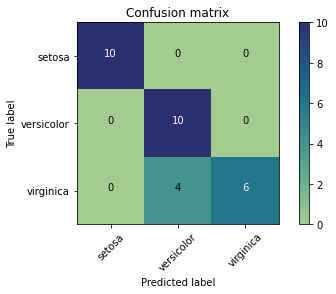

In [800]:
cm = confusion_matrix(y_test,prediction)
plot_confusion_matrix(cm,classes=['setosa', 'versicolor', 'virginica'])

## Problem 3

In [801]:
#calculating accuracies for different k
acc=[]
range_for_k = [3,5,7]
range_of_r = [1,2,4]
for k in range_for_k:
    for r in range_of_r:
        knn = KNN(k=k, r=r)
        knn.fit(x_train,y_train)
        prediction = knn.predict(x_test)
        accu=knn.accuracy_score(y_test,prediction)
        acc.append({'Accuaracy':accu,'k':k,'r':r})
print(pd.DataFrame(acc))

    Accuaracy  k  r
0   90.000000  3  1
1  100.000000  3  2
2  100.000000  3  4
3   86.666667  5  1
4   90.000000  5  2
5   90.000000  5  4
6   80.000000  7  1
7   83.333333  7  2
8   86.666667  7  4


## Problem 4

In [806]:
df = x[50:]
y_ = y[50:]

In [807]:
def decision_boundry(data):
    decision = []
    for i in range(100):
        if (data[['petal length (cm)']].iloc[i].values> 4.8 and data[['petal width (cm)']].iloc[i].values>1.7):
            decision.append(2) 
        else: 
            decision.append(1)
    return np.array(decision)

In [808]:
prediction = decision_boundry(df)

In [809]:
 def accuracy_score(y_test,predicted):
        correct=0
        actual = np.array(y_test)
        for i in range(len(actual)):
            if actual[i]==predicted[i]:
                correct+=1
        return correct/len(predicted)*100

In [810]:
accuracy_score(y_,prediction)

93.0

In [814]:
def sensitivity(y_,pred):
    count = 0
    y_ = np.array(y_)
    pred = np.array(pred)
    for i in range(len(pred)):
        if pred[i] == 2 & y_[i] == 2:
            count+=1
    return count/50

def specificity(y_,pred):
    count = 0
    y_ = np.array(y_)
    pred = np.array(pred)
    for i in range(len(pred)):
        if pred[i] == 1 & y_[i] == 1:
            count+=1
    return count/50

In [815]:
sensitivity(y_,prediction)

0.86

In [816]:
specificity(y_,prediction)

1.0